In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [373]:
data1=pd.read_excel(r"C:\Users\Tejes\OneDrive\Desktop\IOT_Intrusion_Dataset.xlsx")

In [374]:
data1.head()

,Fwd_IAT_Max,Bwd_IAT_Max,PSH_Flag_Cnt,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Active_Max,Idle_Max,Label,Cat
0,0,0,0,1921.000000,982.0,1430.000000,1,982,1,1430,0,75,Anomaly,Mirai
1,0,5310,0,0.000000,0.0,0.000000,1,0,2,0,0,4254,Anomaly,DoS
2,0,71,0,1398.000000,0.0,935.333333,0,0,3,2806,0,71,Anomaly,Scan
3,0,151,0,2082.000000,0.0,1388.000000,0,0,2,2776,0,151,Anomaly,Mirai
4,76,0,0,575.333333,443.0,420.000000,2,886,1,420,0,77,Anomaly,Mirai


In [375]:
data1.tail()

,Fwd_IAT_Max,Bwd_IAT_Max,PSH_Flag_Cnt,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Active_Max,Idle_Max,Label,Cat
2994,0,78,0,0.0,0.0,0.0,0,0,2,0,0,78,Normal,Normal
2995,0,9325,0,0.0,0.0,0.0,0,0,2,0,0,9325,Anomaly,DoS
2996,73,0,0,0.0,0.0,0.0,4,0,1,0,0,73,Anomaly,Mirai
2997,0,85,0,2082.0,0.0,1388.0,0,0,2,2776,0,85,Anomaly,MITM ARP Spoofing
2998,0,72,0,2082.0,0.0,1388.0,0,0,2,2776,0,72,Anomaly,Mirai


In [376]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fwd_IAT_Max       2999 non-null   int64  
 1   Bwd_IAT_Max       2999 non-null   int64  
 2   PSH_Flag_Cnt      2999 non-null   int64  
 3   Pkt_Size_Avg      2999 non-null   float64
 4   Fwd_Seg_Size_Avg  2999 non-null   float64
 5   Bwd_Seg_Size_Avg  2999 non-null   float64
 6   Subflow_Fwd_Pkts  2999 non-null   int64  
 7   Subflow_Fwd_Byts  2999 non-null   int64  
 8   Subflow_Bwd_Pkts  2999 non-null   int64  
 9   Subflow_Bwd_Byts  2999 non-null   int64  
 10  Active_Max        2999 non-null   int64  
 11  Idle_Max          2999 non-null   int64  
 12  Label             2999 non-null   object 
 13  Cat               2999 non-null   object 
dtypes: float64(3), int64(9), object(2)
memory usage: 328.1+ KB


In [377]:
data1.shape

(2999, 14)

In [378]:
data1.isna().sum()

Fwd_IAT_Max         0
Bwd_IAT_Max         0
PSH_Flag_Cnt        0
Pkt_Size_Avg        0
Fwd_Seg_Size_Avg    0
Bwd_Seg_Size_Avg    0
Subflow_Fwd_Pkts    0
Subflow_Fwd_Byts    0
Subflow_Bwd_Pkts    0
Subflow_Bwd_Byts    0
Active_Max          0
Idle_Max            0
Label               0
Cat                 0
dtype: int64

In [379]:
# No Null Values Found !

# Label encoding the categorical features

In [380]:
data1.columns

Index(['Fwd_IAT_Max', 'Bwd_IAT_Max', 'PSH_Flag_Cnt', 'Pkt_Size_Avg',
       'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg', 'Subflow_Fwd_Pkts',
       'Subflow_Fwd_Byts', 'Subflow_Bwd_Pkts', 'Subflow_Bwd_Byts',
       'Active_Max', 'Idle_Max', 'Label', 'Cat'],
      dtype='object')

In [381]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data1['Label']=label_encoder.fit_transform(data1['Label'])
data1['Cat']=label_encoder.fit_transform(data1['Cat'])

In [382]:
type(data1)

pandas.core.frame.DataFrame

# Binary Classification using 'Label' as column to classify anomaly/normal

<AxesSubplot:>

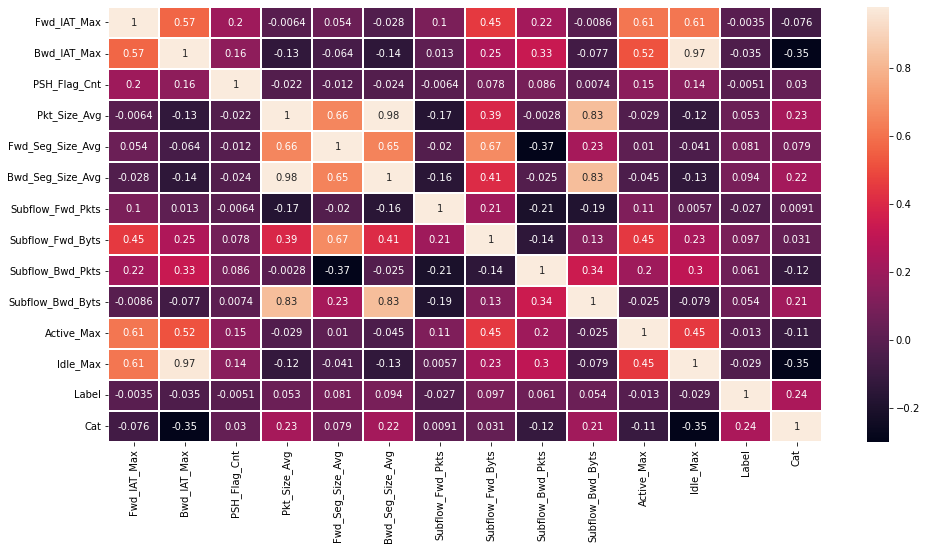

In [383]:
corrematrix=data1.corr()
plt.subplots(figsize=(16,8))
sns.heatmap(corrematrix,vmin=-0.3,vmax=0.98,annot=True,linewidth=0.2)

In [384]:
# dropping features which have least correlation
data1=data1.drop(['PSH_Flag_Cnt','Cat','Subflow_Fwd_Pkts'],axis=1)
data1

,Fwd_IAT_Max,Bwd_IAT_Max,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Active_Max,Idle_Max,Label
0,0,0,1921.000000,982.0,1430.000000,982,1,1430,0,75,0
1,0,5310,0.000000,0.0,0.000000,0,2,0,0,4254,0
2,0,71,1398.000000,0.0,935.333333,0,3,2806,0,71,0
3,0,151,2082.000000,0.0,1388.000000,0,2,2776,0,151,0
4,76,0,575.333333,443.0,420.000000,886,1,420,0,77,0
...,...,...,...,...,...,...,...,...,...,...,...
2994,0,78,0.000000,0.0,0.000000,0,2,0,0,78,1
2995,0,9325,0.000000,0.0,0.000000,0,2,0,0,9325,0
2996,73,0,0.000000,0.0,0.000000,0,1,0,0,73,0
2997,0,85,2082.000000,0.0,1388.000000,0,2,2776,0,85,0


In [385]:
data1.dtypes

Fwd_IAT_Max           int64
Bwd_IAT_Max           int64
Pkt_Size_Avg        float64
Fwd_Seg_Size_Avg    float64
Bwd_Seg_Size_Avg    float64
Subflow_Fwd_Byts      int64
Subflow_Bwd_Pkts      int64
Subflow_Bwd_Byts      int64
Active_Max            int64
Idle_Max              int64
Label                 int32
dtype: object

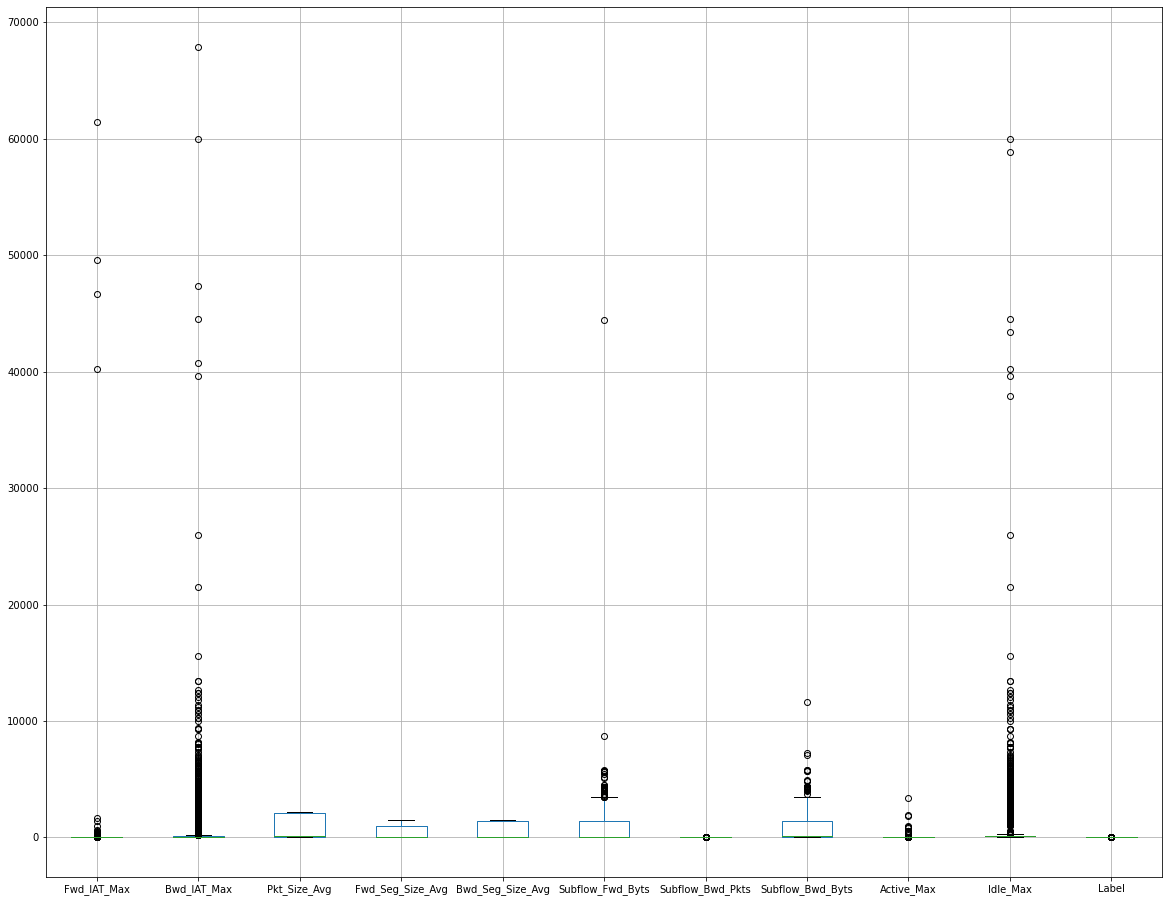

In [386]:
# Handling Outliers
graph=data1.select_dtypes(include=['float64','int64','int32'])
graph.boxplot(figsize=(20,16))
plt.show()

In [387]:
# Handling Outliers 
Q1=data1.quantile(.25)
Q3=data1.quantile(.75)
IQR=Q3-Q1
print(((data1<Q1-1.5*IQR)|(data1>Q3+1.5*IQR)).sum())

Fwd_IAT_Max         623
Bwd_IAT_Max         341
Pkt_Size_Avg          0
Fwd_Seg_Size_Avg      0
Bwd_Seg_Size_Avg      0
Subflow_Fwd_Byts     75
Subflow_Bwd_Pkts     59
Subflow_Bwd_Byts     86
Active_Max          110
Idle_Max            383
Label               178
dtype: int64


In [388]:
Q1=np.percentile(data1['Fwd_IAT_Max'],25,interpolation='midpoint')
Q2=np.percentile(data1['Fwd_IAT_Max'],50,interpolation='midpoint')
Q3=np.percentile(data1['Fwd_IAT_Max'],75,interpolation='midpoint')
print(Q1,Q2,Q3)
#Computation of IQR,lower limit and upper limit
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
print(ll,ul)
#Identifying outlier values
outliers=[]
for x in data1['Fwd_IAT_Max']:
    if (x>ul)or(x<ll):
        outliers.append(x)
ind=data1['Fwd_IAT_Max']>ul
i=data1.loc[ind].index
data1.drop(i,inplace=True)

0.0 0.0 6.0
-9.0 15.0


In [389]:
Q1=np.percentile(data1['Bwd_IAT_Max'],25,interpolation='midpoint')
Q2=np.percentile(data1['Bwd_IAT_Max'],50,interpolation='midpoint')
Q3=np.percentile(data1['Bwd_IAT_Max'],75,interpolation='midpoint')
print(Q1,Q2,Q3)
#Computation of IQR,lower limit and upper limit
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
print(ll,ul)
#Identifying outlier values
outliers=[]
for x in data1['Bwd_IAT_Max']:
    if (x>ul)or(x<ll):
        outliers.append(x)
ind=data1['Bwd_IAT_Max']>ul
i=data1.loc[ind].index
data1.drop(i,inplace=True)

0.0 0.0 119.0
-178.5 297.5


In [390]:
Q1=np.percentile(data1['Subflow_Fwd_Byts'],25,interpolation='midpoint')
Q2=np.percentile(data1['Subflow_Fwd_Byts'],50,interpolation='midpoint')
Q3=np.percentile(data1['Subflow_Fwd_Byts'],75,interpolation='midpoint')
print(Q1,Q2,Q3)
#Computation of IQR,lower limit and upper limit
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
print(ll,ul)
#Identifying outlier values
outliers=[]
for x in data1['Subflow_Fwd_Byts']:
    if (x>ul)or(x<ll):
        outliers.append(x)
ind=data1['Subflow_Fwd_Byts']>ul
i=data1.loc[ind].index
data1.drop(i,inplace=True)

0.0 32.0 987.0
-1480.5 2467.5


In [391]:
Q1=np.percentile(data1['Idle_Max'],25,interpolation='midpoint')
Q2=np.percentile(data1['Idle_Max'],50,interpolation='midpoint')
Q3=np.percentile(data1['Idle_Max'],75,interpolation='midpoint')
print(Q1,Q2,Q3)
#Computation of IQR,lower limit and upper limit
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
print(ll,ul)
#Identifying outlier values
outliers=[]
for x in data1['Idle_Max']:
    if (x>ul)or(x<ll):
        outliers.append(x)
ind=data1['Idle_Max']>ul
i=data1.loc[ind].index
data1.drop(i,inplace=True)

72.0 85.0 127.0
-10.5 209.5


In [392]:
Q1=np.percentile(data1['Subflow_Bwd_Byts'],25,interpolation='midpoint')
Q2=np.percentile(data1['Subflow_Bwd_Byts'],50,interpolation='midpoint')
Q3=np.percentile(data1['Subflow_Bwd_Byts'],75,interpolation='midpoint')
print(Q1,Q2,Q3)
#Computation of IQR,lower limit and upper limit
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
print(ll,ul)
#Identifying outlier values
outliers=[]
for x in data1['Subflow_Bwd_Byts']:
    if (x>ul)or(x<ll):
        outliers.append(x)
ind=data1['Subflow_Bwd_Byts']>ul
i=data1.loc[ind].index
data1.drop(i,inplace=True)

32.0 1388.0 1448.0
-2092.0 3572.0


<AxesSubplot:>

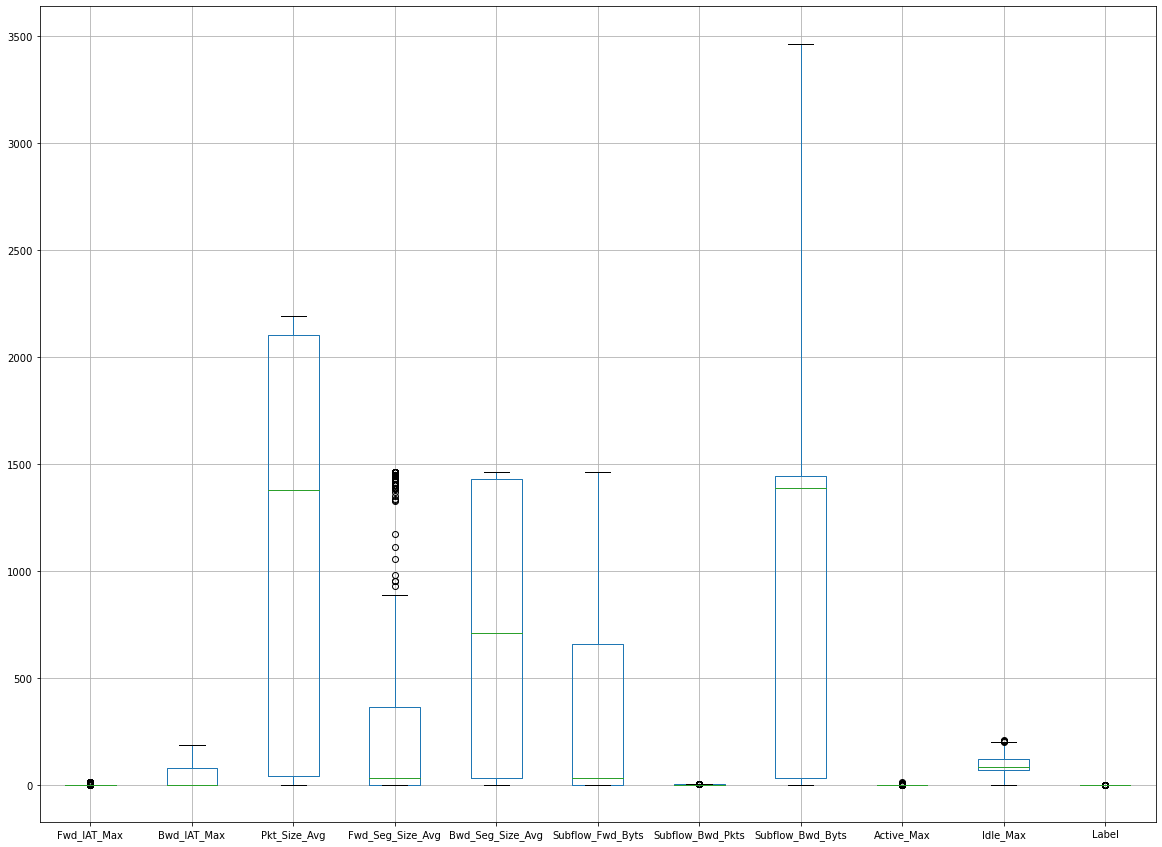

In [393]:
graph=data1.select_dtypes(include=['int32','float64','int64'])
graph.boxplot(figsize=(20,15))

In [394]:
# Splitting the data for training and testing

In [395]:
x=data1.drop('Label',axis=1) #features
y=data1['Label'] #targets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [396]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
neighbors=np.arange(3,15)
acc_values=[]
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    
    
    


In [397]:
acc_values

[0.986449864498645,
 0.983739837398374,
 0.981029810298103,
 0.983739837398374,
 0.983739837398374,
 0.983739837398374,
 0.983739837398374,
 0.983739837398374,
 0.983739837398374,
 0.983739837398374,
 0.983739837398374,
 0.983739837398374]

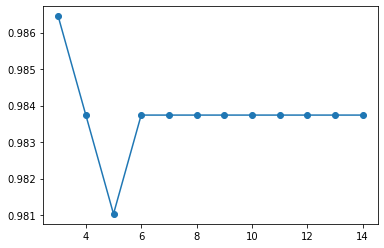

In [398]:
plt.plot(neighbors,acc_values,'o-')

In [399]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=2,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [400]:
acc_values

[0.986449864498645,
 0.986449864498645,
 0.986449864498645,
 0.986449864498645,
 0.986449864498645,
 0.986449864498645,
 0.986449864498645,
 0.986449864498645,
 0.986449864498645,
 0.986449864498645,
 0.986449864498645,
 0.986449864498645]

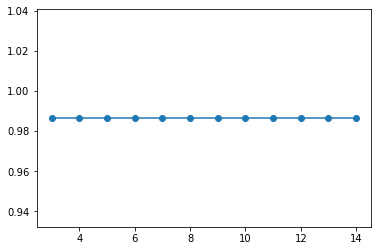

In [401]:
plt.plot(neighbors,acc_values,'o-')
plt.show()

In [402]:
print("Accuracy Value is: ", accuracy_score(y_test,y_pred))
print("Precision Value is: ", precision_score(y_test,y_pred,average='macro'))
print("Recall Value is: ", recall_score(y_test,y_pred,average='macro'))
print("F1 Score is: ", f1_score(y_test,y_pred,average='macro'))

Accuracy Value is:  0.986449864498645
Precision Value is:  0.8278688524590163
Recall Value is:  0.6652892561983471
F1 Score is:  0.7187928669410151


In [403]:
y_test.value_counts()

0    363
1      6
Name: Label, dtype: int64

In [404]:
confusion_matrix(y_test,y_pred)

array([[362,   1],
       [  4,   2]], dtype=int64)

# Standard Scalling the Features

In [405]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)



In [406]:
# Checking the values of KNN after standard scalling

In [407]:
neighbors=np.arange(3,15)
acc_values=[]
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=2,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [408]:
print("Accuracy Value is: ", accuracy_score(y_test,y_pred))
print("Precision Value is: ", precision_score(y_test,y_pred,average='macro'))
print("Recall Value is: ", recall_score(y_test,y_pred,average='macro'))
print("F1 Score is: ", f1_score(y_test,y_pred,average='macro'))

Accuracy Value is:  0.981029810298103
Precision Value is:  0.49184782608695654
Recall Value is:  0.4986225895316804
F1 Score is:  0.49521203830369354


In [409]:
y_test.value_counts()

0    363
1      6
Name: Label, dtype: int64

In [410]:
confusion_matrix(y_test,y_pred)

array([[362,   1],
       [  6,   0]], dtype=int64)

In [411]:
# Logistic Regression Model

In [412]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)
y_pred=logit.predict(x_test)

In [413]:
print("Accuracy Value is: ", accuracy_score(y_test,y_pred))
print("Precision Value is: ", precision_score(y_test,y_pred,average='macro'))
print("Recall Value is: ", recall_score(y_test,y_pred,average='macro'))
print("F1 Score is: ", f1_score(y_test,y_pred,average='macro'))

Accuracy Value is:  0.983739837398374
Precision Value is:  0.491869918699187
Recall Value is:  0.5
F1 Score is:  0.4959016393442623


In [414]:
y_test.value_counts()

0    363
1      6
Name: Label, dtype: int64

In [415]:
confusion_matrix(y_test,y_pred)

array([[363,   0],
       [  6,   0]], dtype=int64)

In [416]:
# Decision Tree Classifier

In [417]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [418]:
y_pred=dt_model.predict(x_test)
print("Accuracy Value is: ", accuracy_score(y_test,y_pred))
print("Precision Value is: ", precision_score(y_test,y_pred,average='macro'))
print("Recall Value is: ", recall_score(y_test,y_pred,average='macro'))
print("F1 Score is: ", f1_score(y_test,y_pred,average='macro'))

Accuracy Value is:  0.978319783197832
Precision Value is:  0.6611570247933884
Recall Value is:  0.6611570247933884
F1 Score is:  0.6611570247933884


In [419]:
y_test.value_counts()

0    363
1      6
Name: Label, dtype: int64

In [420]:
confusion_matrix(y_test,y_pred)

array([[359,   4],
       [  4,   2]], dtype=int64)

In [421]:
# Support Vector Machine

In [422]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')

In [423]:
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [424]:
y_pred=svm_linear.predict(x_test)

In [425]:
print("Accuracy Value is: ", accuracy_score(y_test,y_pred))
print("Precision Value is: ", precision_score(y_test,y_pred,average='macro'))
print("Recall Value is: ", recall_score(y_test,y_pred,average='macro'))
print("F1 Score is: ", f1_score(y_test,y_pred,average='macro'))

Accuracy Value is:  0.983739837398374
Precision Value is:  0.491869918699187
Recall Value is:  0.5
F1 Score is:  0.4959016393442623


In [426]:
y_test.value_counts()

0    363
1      6
Name: Label, dtype: int64

In [427]:
confusion_matrix(y_test,y_pred)

array([[363,   0],
       [  6,   0]], dtype=int64)

In [428]:
svm_poly=SVC(kernel='poly',degree=3)

In [429]:
svm_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [430]:
y_pred=svm_poly.predict(x_test)

In [431]:
print("Accuracy Value is: ", accuracy_score(y_test,y_pred))
print("Precision Value is: ", precision_score(y_test,y_pred,average='macro'))
print("Recall Value is: ", recall_score(y_test,y_pred,average='macro'))
print("F1 Score is: ", f1_score(y_test,y_pred,average='macro'))

Accuracy Value is:  0.983739837398374
Precision Value is:  0.491869918699187
Recall Value is:  0.5
F1 Score is:  0.4959016393442623


In [432]:
confusion_matrix(y_test,y_pred)

array([[363,   0],
       [  6,   0]], dtype=int64)

In [433]:
svm_radial=SVC(kernel='rbf')

In [434]:
svm_radial.fit(x_train,y_train)

SVC()

In [435]:
y_pred=svm_radial.predict(x_test)

In [436]:
print("Accuracy Value is: ", accuracy_score(y_test,y_pred))
print("Precision Value is: ", precision_score(y_test,y_pred,average='macro'))
print("Recall Value is: ", recall_score(y_test,y_pred,average='macro'))
print("F1 Score is: ", f1_score(y_test,y_pred,average='macro'))

Accuracy Value is:  0.983739837398374
Precision Value is:  0.491869918699187
Recall Value is:  0.5
F1 Score is:  0.4959016393442623


In [437]:
confusion_matrix(y_test,y_pred)

array([[363,   0],
       [  6,   0]], dtype=int64)

In [438]:
# Random Forest

In [439]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [440]:
y_pred=rf.predict(x_test)

In [441]:
print("Accuracy Value is: ", accuracy_score(y_test,y_pred))
print("Precision Value is: ", precision_score(y_test,y_pred,average='macro'))
print("Recall Value is: ", recall_score(y_test,y_pred,average='macro'))
print("F1 Score is: ", f1_score(y_test,y_pred,average='macro'))

Accuracy Value is:  0.978319783197832
Precision Value is:  0.6611570247933884
Recall Value is:  0.6611570247933884
F1 Score is:  0.6611570247933884


In [442]:
confusion_matrix(y_test,y_pred)

array([[359,   4],
       [  4,   2]], dtype=int64)

In [443]:
# Gradient Boosting

In [444]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [445]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [446]:
y_pred=gb.predict(x_test)

In [447]:
print("Accuracy Value is: ", accuracy_score(y_test,y_pred))
print("Precision Value is: ", precision_score(y_test,y_pred,average='macro'))
print("Recall Value is: ", recall_score(y_test,y_pred,average='macro'))
print("F1 Score is: ", f1_score(y_test,y_pred,average='macro'))

Accuracy Value is:  0.983739837398374
Precision Value is:  0.7445205479452055
Recall Value is:  0.6639118457300276
F1 Score is:  0.6958791208791208


In [448]:
confusion_matrix(y_test,y_pred)

array([[361,   2],
       [  4,   2]], dtype=int64)

In [449]:
# #Feature Importance for Random Forest

In [450]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending = False)*100

Idle_Max            47.080908
Bwd_IAT_Max         17.334366
Pkt_Size_Avg         7.852099
Subflow_Bwd_Byts     7.163880
Subflow_Bwd_Pkts     6.863869
Subflow_Fwd_Byts     4.842808
Bwd_Seg_Size_Avg     4.536046
Fwd_Seg_Size_Avg     4.319953
Fwd_IAT_Max          0.005830
Active_Max           0.000240
dtype: float64

In [451]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [452]:
rf1=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion="entropy")

In [453]:
rf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,
                       random_state=42)

In [454]:
y_pred=rf.predict(x_test)

In [455]:
print("Accuracy Value is: ", accuracy_score(y_test,y_pred))
print("Precision Value is: ", precision_score(y_test,y_pred,average='macro'))
print("Recall Value is: ", recall_score(y_test,y_pred,average='macro'))
print("F1 Score is: ", f1_score(y_test,y_pred,average='macro'))

Accuracy Value is:  0.978319783197832
Precision Value is:  0.6611570247933884
Recall Value is:  0.6611570247933884
F1 Score is:  0.6611570247933884


# Navies Bayes

In [456]:
#Feature scaling
x_train = pd.DataFrame(x_train, columns = x.columns)
cols = x_train.columns
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train = pd.DataFrame(x_train, columns=[cols])        
x_test = pd.DataFrame(x_test, columns=[cols])  

In [457]:
#Model training
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [458]:
y_pred = gnb.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,

In [459]:
#check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.1924


In [460]:
#compare the train-set and test-set accuracy to check for overfitting.
y_pred_train = gnb.predict(x_train)
y_pred_train

array([1, 0, 1, ..., 1, 1, 1])

In [461]:
#Printing confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 65 298]
 [  0   6]]

True Positives(TP) =  65

True Negatives(TN) =  6

False Positives(FP) =  298

False Negatives(FN) =  0


In [462]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [463]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification accuracy : 0.1924
Classification error : 0.8076


In [465]:
# findings: i) Objective:To identify anomaly in a IOT sensor network---ie target is anomaly/normal Classification algorithms used i)KNN-accuracy without scaling --98.64% KNN with standard scaling--98.10% ii)Logistic regression model--accuracy=98.37% iii)Decision Tree Classifier-accuracy=97.83% iv)SVM--(linear,polynomial,radial accuracy)=98.37% v)Random forest---accuracy-97.83% vi)Gradient Boosting---accuracy-98.37 vii) Naive Bayes---accuracy-19% Hence can be concluded that KNN without scaling is the best model to suit our purpose.

